In [1]:
## Install before start
# pip install pandas
# pip install geopandas
# pip install shapely
# pip install geopy
# pip install pytz
# pip install holidays
# pip install folium

# Comprehension of data

### Import Libraries

In [2]:
import os
import re
import csv
import geopandas as gpd
import pandas as pd

### Get the paths to the folders in the dataset

In [3]:
notebook_folder = os.getcwd()
root_project = os.path.abspath(os.path.join(notebook_folder, '.'))
dataset_logs = os.path.abspath(os.path.join(root_project, 'Datos', 'Logs'))
trufi_datos = os.path.abspath(os.path.join(root_project, 'Datos', 'Registros de Trufi App'))
municipios_datos = os.path.abspath(os.path.join(root_project, 'Datos', 'Poligonos','peru_provincial_simple.geojson'))

### Get files

In [4]:
# Get the list of files and sort them by numeric prefix
def get_sorted_files(dataset_logs):
    files = os.listdir(dataset_logs)
    file_pattern = re.compile(r'^\d{2}-')
    log_files = [file for file in files if file_pattern.match(file)]
    log_files.sort(key=lambda x: int(x.split('-')[0]))
    return log_files

# Save information to a CSV file
csv_file_path = os.path.join(dataset_logs, 'route_info.csv')

# Get the list of sorted files by numeric prefix
sorted_logs = get_sorted_files(dataset_logs)
sorted_logs

['01-arequipa-data.log']

### Get summary of Trufi-App logs

In [5]:
def get_file_summary(file_path):
    # Get the number of lines and file size
    num_lines = sum(1 for line in open(file_path, 'r'))
    file_size = os.path.getsize(file_path)  # Size in bytes
    return num_lines, file_size

# List to store the summaries of each file
file_summaries = []

# Print the log descriptions
for log_file in sorted_logs:
    file_path = os.path.join(dataset_logs, log_file)
    
    num_lines, file_size = get_file_summary(file_path)

    # Store the summary in the list
    summary = log_file, num_lines, file_size
    file_summaries.append(summary)

file_summaries

[('01-arequipa-data.log', 8455434, 1289679079)]

### Print summary

In [6]:
# Print individual summaries for the second column (num_lines)
for file_name, num_lines, _ in file_summaries:
    print(f"{file_name}: {num_lines} lines")

# Print the total number of lines
total_lines = sum(num_lines for _, num_lines, _ in file_summaries)
print(f"Total lines across all files: {total_lines} lines.\n")

# Print individual summaries for the third column (file_size)
for file_name, _, file_size in file_summaries:
    print(f"{file_name}: Size: {file_size} bytes")

# Print the total size of all files
total_size = sum(file_size for _, _, file_size in file_summaries)
print(f"Total size of all files: {total_size} bytes.")
print("Process completed.")

01-arequipa-data.log: 8455434 lines
Total lines across all files: 8455434 lines.

01-arequipa-data.log: Size: 1289679079 bytes
Total size of all files: 1289679079 bytes.
Process completed.


### Counting route requests

In [12]:
# Regular expressions to extract specific information from photon API requests
route_pattern_with_id = re.compile(
    r'GET /otp/routers/default/plan\?fromPlace=([-0-9.]+)%2C([-0-9.]+)&toPlace=([-0-9.]+)%2C([-0-9.]+).*?Trufi/.*?/([a-f0-9-]+)'
)

# Counters for route request lines
count_requests_with_id = 0

# Iterate through the lines of the log files
for log_file in sorted_logs:
    file_path = os.path.join(dataset_logs, log_file)
    
    with open(file_path, 'r') as f:
        for line in f:
            # Check if the line is a route request with ID
            if route_pattern_with_id.search(line):
                count_requests_with_id += 1

# Print the counts
print(f'Count of route requests with ID: {count_requests_with_id}')

Count of route requests with ID: 22451


### Imprimir resultados

In [13]:
print(f"Route requests with ID: {count_requests_with_id} lines.")

Route requests with ID: 22451 lines.


### Get geographic division data of study area

First rows of the GeoDataFrame:
    COUNT FIRST_IDPR                   NOMBPROV    FIRST_NOMB LAST_DCTO  \
0       9       0301                    ABANCAY      APURIMAC       LEY   
1       8       0902                   ACOBAMBA  HUANCAVELICA       LEY   
2       7       0802                    ACOMAYO         CUSCO       LEY   
3       5       0202                       AIJA        ANCASH       LEY   
4       6       1602              ALTO AMAZONAS        LORETO       LEY   
5       8       1002                       AMBO       HUANUCO       LEY   
6      19       0302                ANDAHUAYLAS      APURIMAC       LEY   
7      12       0903                   ANGARAES  HUANCAVELICA       LEY   
8       9       0803                       ANTA         CUSCO       LEY   
9       7       0303                  ANTABAMBA      APURIMAC       LEY   
10      6       0203           ANTONIO RAYMONDI        ANCASH       LEY   
11     29       0401                   AREQUIPA      AREQUIPA       

<Axes: >

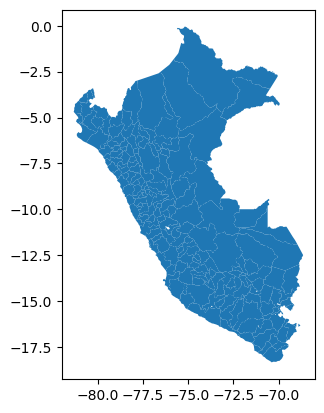

In [9]:
# Load the GeoDataFrame from the GeoJSON
gdf = gpd.read_file(municipios_datos)

# Print the first rows of the GeoDataFrame
print("First rows of the GeoDataFrame:")
print(gdf.head(50))

# Visualize the GeoDataFrame
gdf.plot()

Filtered rows from the department of Arequipa:
     COUNT FIRST_IDPR    NOMBPROV FIRST_NOMB LAST_DCTO LAST_LEY    FIRST_FECH  \
11      29       0401    AREQUIPA   AREQUIPA       LEY    14124  EPOCA INDEP.   
29       8       0402      CAMANA   AREQUIPA       LEY     9999  EPOCA INDEP.   
37      13       0403    CARAVELI   AREQUIPA       LEY    12450    09/12/1897   
41      14       0404    CASTILLA   AREQUIPA         -        -  EPOCA INDEP.   
43      20       0405    CAYLLOMA   AREQUIPA         -        -    20/12/1999   
57       8       0406  CONDESUYOS   AREQUIPA       LEY      S/N    26/11/1917   
97       6       0407       ISLAY   AREQUIPA       LEY      S/N    03/01/1879   
105     11       0408    LA UNION   AREQUIPA         -        -    19/11/1954   

       LAST_FECHA    MIN_SHAPE_          ha  \
11     15/06/1962  9.622469e+05   962246.88   
29     03/11/1944  3.998924e+05   399892.40   
37     24/11/1955  1.300148e+06  1300147.81   
41   EPOCA INDEP.  6.929114e+05   6

<Axes: >

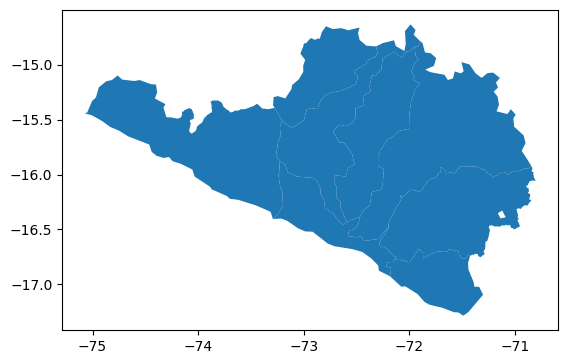

In [10]:
# Load the GeoDataFrame from the GeoJSON
gdf = gpd.read_file(municipios_datos)

# Filter the GeoDataFrame to include only features from "Arequipa"
arequipa_gdf = gdf[gdf['FIRST_NOMB'] == 'AREQUIPA']

# Print the filtered rows of the GeoDataFrame
print("Filtered rows from the department of Arequipa:")
print(arequipa_gdf)

# Visualize the filtered GeoDataFrame
arequipa_gdf.plot()
